In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
home_page = pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Funnel Analysis/Funnel/home_page_table.csv')
payment_confirmation= pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Funnel Analysis/Funnel/payment_confirmation_table.csv')
payment_page = pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Funnel Analysis/Funnel/payment_page_table.csv')
search_page = pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Funnel Analysis/Funnel/search_page_table.csv')
user = pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Funnel Analysis/Funnel/user_table.csv')

In [6]:
home_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [8]:
search_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
page       45200 non-null object
dtypes: int64(1), object(1)
memory usage: 706.3+ KB


In [9]:
## Less user in this dataset. It makes sense in the funnel process

In [10]:
payment_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [11]:
## less user in this data than the previous page

In [12]:
payment_confirmation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
user_id    452 non-null int64
page       452 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [13]:
## only 452 users in this page

# Questin 1: A full picture of funnel conversion rate for both desktop and mobile

In [14]:
df= user.merge(home_page, on = 'user_id').merge(search_page, how = 'left', on= 'user_id').merge(payment_page, how = 'left', on= 'user_id').merge(payment_confirmation, how = 'left', on = 'user_id')

In [15]:
df.columns = ['user_id', 'date', 'device', 'sex', 'home_page', 'search_page', 'payment_page', 'confirmation_page']
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [16]:
df[['search_page', 'home_page', 'payment_page', 'confirmation_page']]= df[['search_page', 'home_page', 'payment_page', 'confirmation_page']].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null object
device               90400 non-null object
sex                  90400 non-null object
home_page            90400 non-null category
search_page          45200 non-null category
payment_page         6030 non-null category
confirmation_page    452 non-null category
dtypes: category(4), int64(1), object(3)
memory usage: 3.8+ MB


# The number of users in each page by device

Text(0.5, 0, '')

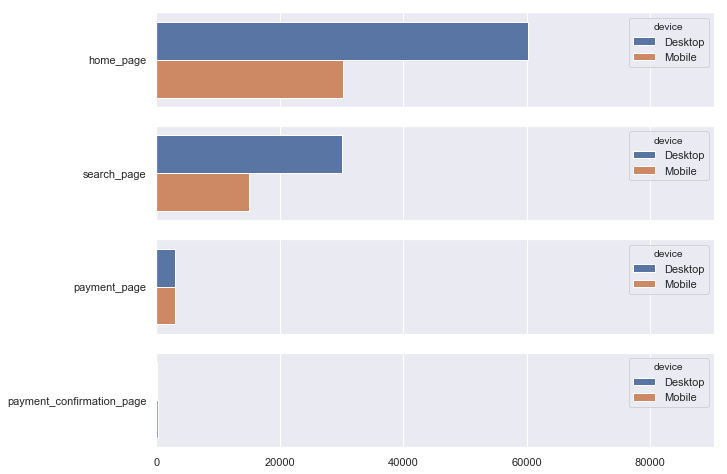

In [18]:
sns.set(style="darkgrid")
fig, ax =plt.subplots(4,1, figsize=(10,8))
max_count = max([max(df[i].value_counts()) for i in df.columns])
A=sns.countplot(y=df['home_page'], hue = df['device'], ax=ax[0])
B=sns.countplot(y=df['search_page'],hue= df['device'],ax=ax[1])
C=sns.countplot(y=df['payment_page'],hue = df['device'], ax=ax[2])
D=sns.countplot(y=df['confirmation_page'],hue= df['device'], ax=ax[3])
ax[0].set_xlim(0,max_count)
ax[1].set_xlim(0,max_count)
ax[2].set_xlim(0,max_count)
ax[3].set_xlim(0,max_count)
A.set(xticklabels=[])
B.set(xticklabels=[])
C.set(xticklabels=[])
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[3].set_ylabel("")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")
ax[3].set_xlabel("")

In [19]:

grouped_device1=  df.groupby(['device','home_page'])['user_id'].count().reset_index()
grouped_device2=  df.groupby(['device','search_page'])['user_id'].count().reset_index()
grouped_device3=  df.groupby(['device','payment_page'])['user_id'].count().reset_index()
grouped_device4=  df.groupby(['device','confirmation_page'])['user_id'].count().reset_index()
grouped_data= grouped_device1.merge(grouped_device2, on= 'device').merge(grouped_device3, on = 'device').merge(grouped_device4, on = 'device')
grouped_data.columns = ['device', 'home', 'home_page', 'search', 'search_page', 'payment', 'payment_page', 'confirms','confirmation_page']
new_df = grouped_data[['device', 'home_page', 'search_page', 'payment_page', 'confirmation_page']]

# The number of users in each stage

In [20]:
print(new_df) 

    device  home_page  search_page  payment_page  confirmation_page
0  Desktop      60200        30100          3010                150
1   Mobile      30200        15100          3020                302


# The visiting probability in each page

In [21]:
new_df[['home_page', 'search_page', 'payment_page', 'confirmation_page']]/len(df)

,home_page,search_page,payment_page,confirmation_page
0,0.665929,0.332965,0.033296,0.001659
1,0.334071,0.167035,0.033407,0.003341


# Conversion Rate by Device

In [26]:
new_df['confirmation_page']/len(df)

0    0.001659
1    0.003341
Name: confirmation_page, dtype: float64

# Check when users leave the page

In [27]:
grouped_date1=  df.groupby(['device','date','confirmation_page'])['user_id'].count().reset_index()
grouped_date1['date'] = pd.to_datetime(grouped_date1['date'])
grouped_date1.head()

,device,date,confirmation_page,user_id
0,Desktop,2015-01-01,payment_confirmation_page,1
1,Desktop,2015-01-02,payment_confirmation_page,1
2,Desktop,2015-01-03,payment_confirmation_page,3
3,Desktop,2015-01-04,payment_confirmation_page,1
4,Desktop,2015-01-05,payment_confirmation_page,3


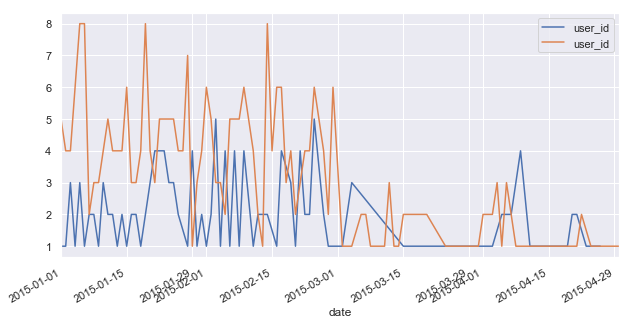

In [28]:
ax = grouped_date1[grouped_date1['device'] == 'Desktop'][['date','user_id']].set_index('date').plot(figsize=(10,5))
grouped_date1[grouped_date1['device'] == 'Mobile'][['date','user_id']].set_index('date').plot(figsize=(10,5), ax= ax)

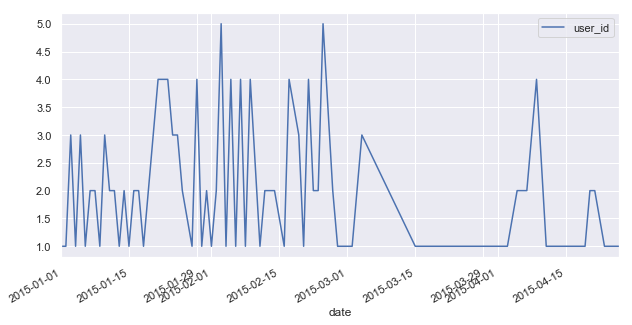

In [29]:
##Not a very clear graph
# Let's check one by one
grouped_date1[grouped_date1['device'] == 'Desktop'][['date','user_id']].set_index('date').plot(figsize=(10,5))

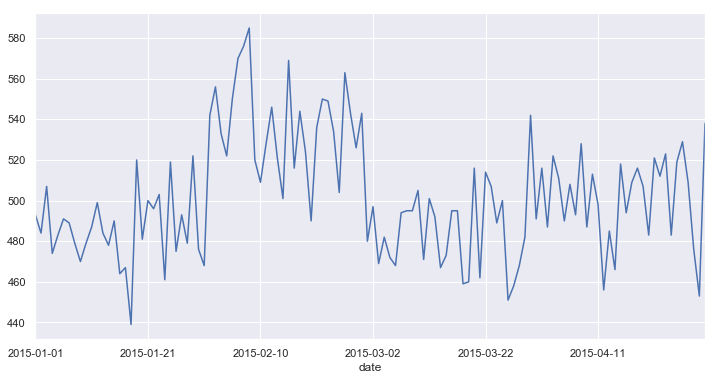

In [38]:
date_groupby = df[(df.device=='Desktop')].groupby('date').count()
plt.figure(figsize=(12,6))
date_groupby['home_page'].plot()

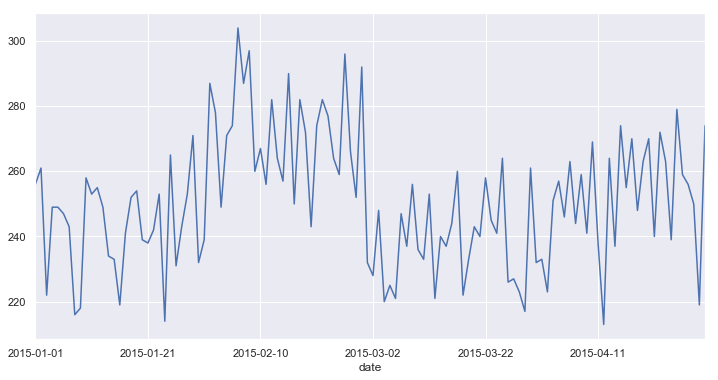

In [39]:
plt.figure(figsize=(12,6))
date_groupby['search_page'].plot()

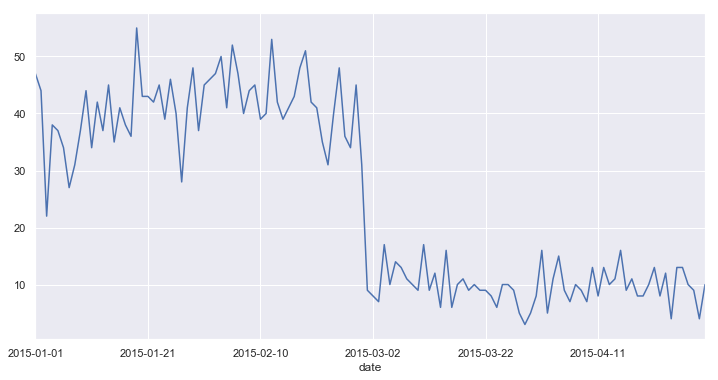

In [40]:
plt.figure(figsize=(12,6))
date_groupby['payment_page'].plot()

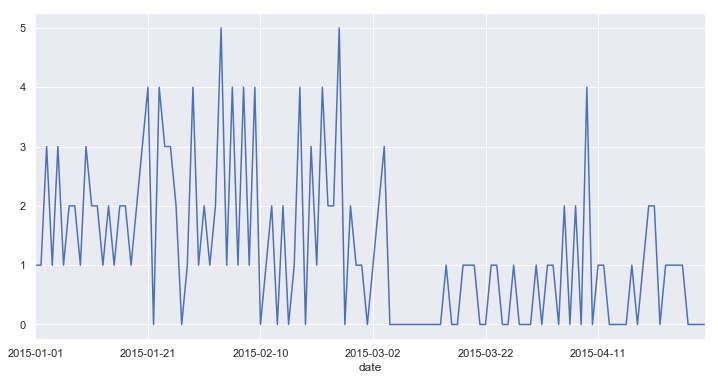

In [41]:
plt.figure(figsize=(12,6))
date_groupby['confirmation_page'].plot()

In [42]:
##Clear insight: something happened on 2015/03/02 and have negative impact on this user conversion

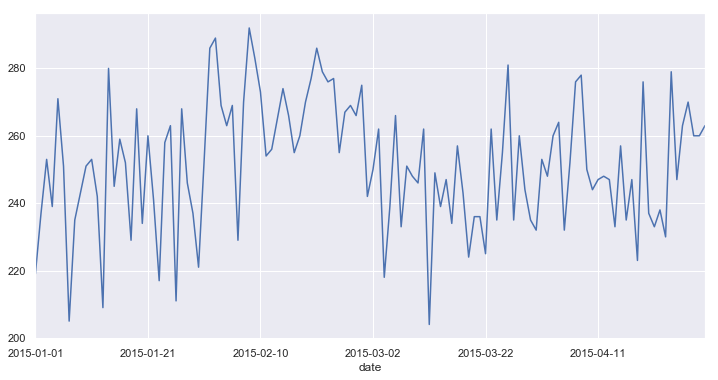

In [43]:
date_groupby2 = df[(df.device=='Mobile')].groupby('date').count()
plt.figure(figsize=(12,6))
date_groupby2['home_page'].plot()

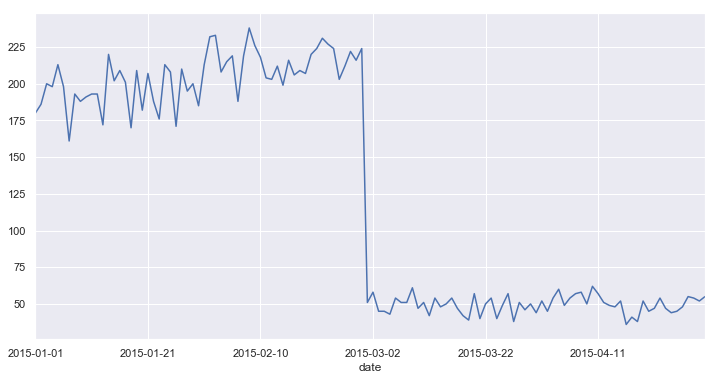

In [44]:
plt.figure(figsize=(12,6))
date_groupby2['search_page'].plot()

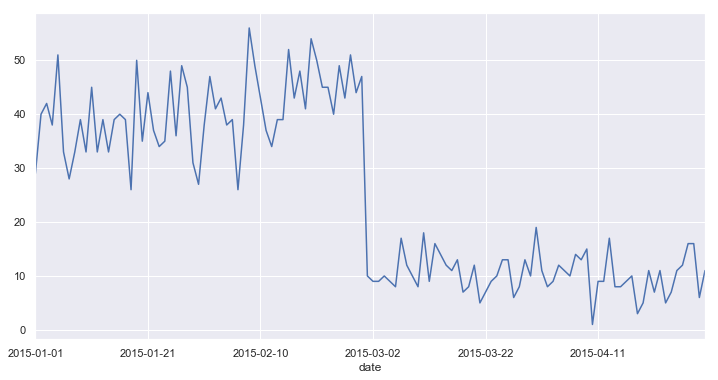

In [45]:
plt.figure(figsize=(12,6))
date_groupby2['payment_page'].plot()

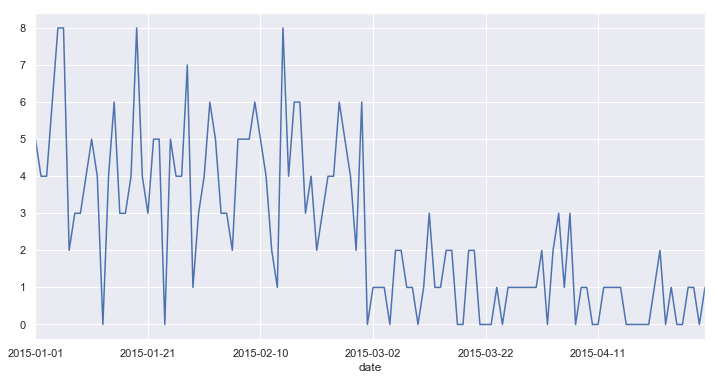

In [46]:
plt.figure(figsize=(12,6))
date_groupby2['confirmation_page'].plot()

In [48]:
## same with Mobile device user. It has negative impact on 2015/03/02. Check with Engineer team to see what happend on 3/1

## Insights Summary:

1. Conversion rate for Desktop user is much lower than device users. A lot Users churn in the payment page. Might need to take a detailed look why they churn in the payment page. Is because payment information are excessive, not like apple pay in the device page? Further AB testing might be needed.

2. Some changes are made on 2015-03-01 have big negative impact on users conversion. Check with engineer team and see what changes have made on that date.

In conversion questions, it's important to figure out when and why users leave.
